In [1]:
import numpy as np
from numpy.random import multivariate_normal
from numpy.random import uniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/home/hanna/Dokumente/Uni/Semester4/01IntelligenteDatanAnalyse/Projekt/einkommen.train")
# add column names
df.columns = ['Alter', 'Beschaeftigung', 'Gewichtung', 'Bildungsgrad', 'Bildungsdauer', 'Familie','Bereich', 'Partnerschaft', 'Ethnie', 'Geschlecht', 'Gewinn', 'Verlust', 'Zeit', 'Geburtsland', 'Einkommen']

In [3]:
# preprocessing
# Classification problem: classes <=50k and >50k change to 0 (= " <=50k") and 1 (= " >50k"); -1 = ' ?'
# One-Hot-Encoding needed for Bildungsgrad, Familienstand, Bereich, Partnerschaft, Ethnie, Geschlecht, Geburtsland
print('Einkommen:\n',df['Einkommen'].value_counts())
# Klassifizierung des Einkommens
df['Einkommen'].replace({' >50K' : 1, ' <=50K':0}, inplace = True)
#df = df[['Alter', 'Familie', 'Gewichtung', 'Gewinn', 'Bildungsdauer', 'Verlust', 'Zeit', 'Partnerschaft', 'Einkommen']]
#df = df.drop(['Geburtsland'], axis=1)
df.head()

Einkommen:
  ?        25000
 <=50K     3779
 >50K      1221
Name: Einkommen, dtype: int64


,Alter,Beschaeftigung,Gewichtung,Bildungsgrad,Bildungsdauer,Familie,Bereich,Partnerschaft,Ethnie,Geschlecht,Gewinn,Verlust,Zeit,Geburtsland,Einkommen
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
#df = df[['Alter', 'Familie', 'Gewichtung', 'Gewinn', 'Bildungsdauer', 'Verlust', 'Zeit', 'Partnerschaft', 'Einkommen']]
#df = df.drop(['Geburtsland'], axis=1)
#df.head()
df.shape

(30000, 15)

In [5]:
# extract train and test data
workdata = df[df.Einkommen != ' ?']
# extract data to apply model
applydata = df[df.Einkommen == ' ?']
#print(df.info())
#preprocessing
# Überblick über unbekannte Daten der verbleibenden Attribute
#wdNames = workdata.columns.values
#for i in wdNames:
#    print(i)
#    print(workdata[str(i)].loc[workdata[str(i)] == ' ?'].value_counts())

# one hot encoding aller daten bis auf Einkommen, deutlich mehr Attribute

wd = pd.get_dummies(workdata.iloc[:,:df.shape[1]-1])
wd['Einkommen'] = workdata['Einkommen']
wd

,Alter,Gewichtung,Bildungsdauer,Gewinn,Verlust,Zeit,Beschaeftigung_ ?,Beschaeftigung_ Federal-gov,Beschaeftigung_ Local-gov,Beschaeftigung_ Private,...,Geburtsland_ Puerto-Rico,Geburtsland_ Scotland,Geburtsland_ South,Geburtsland_ Taiwan,Geburtsland_ Thailand,Geburtsland_ Trinadad&Tobago,Geburtsland_ United-States,Geburtsland_ Vietnam,Geburtsland_ Yugoslavia,Einkommen
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,222971,3,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4996,31,259425,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4997,47,212120,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4998,26,245880,9,0,0,60,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
from scipy.stats import zscore

work = zscore(wd.iloc[:, :105])
# preprocessing
# splitting in Y und X

X = pd.DataFrame(work).iloc[:,:105] # alle Daten außer Einkommen
y = pd.DataFrame(wd).iloc[:,105] #letztendliche Klassifizierung nach Einkommen

In [7]:
# 5000 Data known => split in Test and Train; 25000 Data to apply model
# splitting in test and training data
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
y_test.shape

(1650,)

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation

Using TensorFlow backend.


In [9]:
model = Sequential()
# hidden layer mit 105 inputs, 10 units
model.add(Dense(20, input_dim=105, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation = 'relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))
history = model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                2120      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 2,571
Trainable params: 2,571
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.fit(X_train, y_train, epochs=150, batch_size=5)

Epoch 1/150
3350/3350 [==============================] - 1s 264us/step - loss: 0.4357 - accuracy: 0.7824 - binary_crossentropy: 0.4357
Epoch 2/150
3350/3350 [==============================] - 1s 189us/step - loss: 0.3367 - accuracy: 0.8415 - binary_crossentropy: 0.3367
Epoch 3/150
3350/3350 [==============================] - 1s 188us/step - loss: 0.3127 - accuracy: 0.8475 - binary_crossentropy: 0.3127
Epoch 4/150
3350/3350 [==============================] - 1s 205us/step - loss: 0.2985 - accuracy: 0.8522 - binary_crossentropy: 0.2985
Epoch 5/150
3350/3350 [==============================] - 1s 177us/step - loss: 0.2868 - accuracy: 0.8651 - binary_crossentropy: 0.2868
Epoch 6/150
3350/3350 [==============================] - 1s 171us/step - loss: 0.2748 - accuracy: 0.8701 - binary_crossentropy: 0.2748
Epoch 7/150
3350/3350 [==============================] - 1s 170us/step - loss: 0.2663 - accuracy: 0.8743 - binary_crossentropy: 0.2663
Epoch 8/150
3350/3350 [==============================] 

3350/3350 [==============================] - 1s 188us/step - loss: 0.1205 - accuracy: 0.9415 - binary_crossentropy: 0.1205
Epoch 62/150
3350/3350 [==============================] - 1s 185us/step - loss: 0.1050 - accuracy: 0.9466 - binary_crossentropy: 0.1050
Epoch 63/150
3350/3350 [==============================] - 1s 241us/step - loss: 0.1047 - accuracy: 0.9490 - binary_crossentropy: 0.1047
Epoch 64/150
3350/3350 [==============================] - 1s 246us/step - loss: 0.1077 - accuracy: 0.9442 - binary_crossentropy: 0.1077
Epoch 65/150
3350/3350 [==============================] - 1s 251us/step - loss: 0.1154 - accuracy: 0.9445 - binary_crossentropy: 0.1154
Epoch 66/150
3350/3350 [==============================] - 1s 251us/step - loss: 0.1090 - accuracy: 0.9463 - binary_crossentropy: 0.1090
Epoch 67/150
3350/3350 [==============================] - 1s 245us/step - loss: 0.1106 - accuracy: 0.9439 - binary_crossentropy: 0.1106
Epoch 68/150
3350/3350 [==============================] - 1s 

3350/3350 [==============================] - 1s 193us/step - loss: 0.0764 - accuracy: 0.9651 - binary_crossentropy: 0.0764
Epoch 121/150
3350/3350 [==============================] - 1s 192us/step - loss: 0.0751 - accuracy: 0.9657 - binary_crossentropy: 0.0751
Epoch 122/150
3350/3350 [==============================] - 1s 190us/step - loss: 0.0792 - accuracy: 0.9615 - binary_crossentropy: 0.0792
Epoch 123/150
3350/3350 [==============================] - 1s 191us/step - loss: 0.0747 - accuracy: 0.9630 - binary_crossentropy: 0.0747
Epoch 124/150
3350/3350 [==============================] - 1s 190us/step - loss: 0.0781 - accuracy: 0.9615 - binary_crossentropy: 0.0781
Epoch 125/150
3350/3350 [==============================] - 1s 197us/step - loss: 0.0926 - accuracy: 0.9579 - binary_crossentropy: 0.0926
Epoch 126/150
3350/3350 [==============================] - 1s 194us/step - loss: 0.0858 - accuracy: 0.9570 - binary_crossentropy: 0.0858
Epoch 127/150
3350/3350 [==============================

In [12]:
result = model.evaluate(X_train,y_train, verbose=0)
print(dict(zip(model.metrics_names, result)))

{'loss': 0.0630580716268785, 'accuracy': 0.9722387790679932, 'binary_crossentropy': 0.06305808573961258}


In [13]:
y_pred = model.predict_classes(X_test)

In [14]:
print('Metrics on Testdata')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))

print()
print('Metrics on all data')
print('Accuracy:', accuracy_score(y, model.predict_classes(X)))
print('Recall:', recall_score(y, model.predict_classes(X)))
print('Precision:', precision_score(y, model.predict_classes(X)))
print('F1 Score:',f1_score(y, model.predict_classes(X)))

Metrics on Testdata
Accuracy: 0.8036363636363636
Recall: 0.6044776119402985
Precision: 0.5955882352941176
F1 Score: 0.6

Metrics on all data
Accuracy: 0.9166
Recall: 0.8329238329238329
Precision: 0.8268292682926829
F1 Score: 0.8298653610771113


In [15]:
def plot_roc_curves(fprs, tprs):    
    fig = plt.figure(figsize=(20,10))
    
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    fig.savefig('NN_ROC.jpg', bbox_inches='tight', dpi=150)
    plt.show()
   

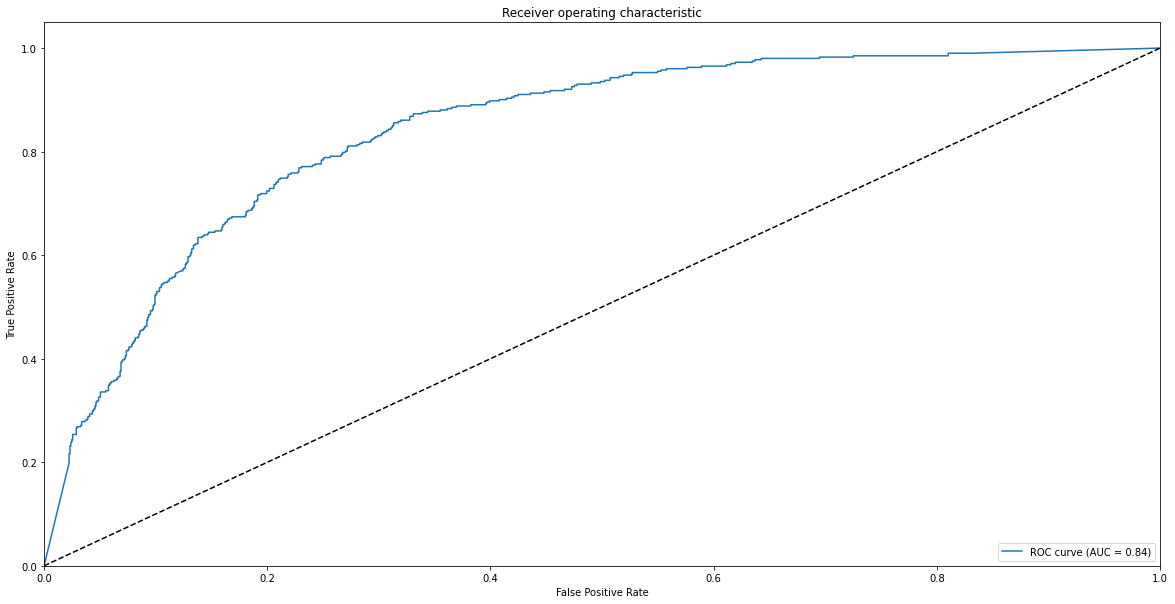

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt

y = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y, pos_label=1)
# plot the curve
plot_roc_curves([fpr], [tpr])


In [17]:
apply = pd.get_dummies(applydata.iloc[:,:-1])

applyName = apply.columns.values
wdName = wd.columns.values
cmp = []
for i in applyName:
    if i not in wdName:
        cmp.append(i)
print(cmp)

print("Data Beschäftigung = Never worked:\n",applydata.loc[applydata['Beschaeftigung'] == ' Never-worked'].Einkommen.value_counts()) # 5
print("Data Geburtsland = Holand-Netherlands:\n",applydata.loc[applydata['Geburtsland'] == ' Holand-Netherlands'].Einkommen.value_counts()) # 1
print("Data Geburtsland = Hungary:\n",applydata.loc[applydata['Geburtsland'] == ' Hungary'].Einkommen.value_counts()) # 12

# replace with ' ?'

applydata.loc[applydata['Beschaeftigung'] == ' Never-worked', 'Beschaeftigung'] = ' ?'
print(applydata.loc[applydata['Beschaeftigung'] == ' Never-worked'].Beschaeftigung)

applydata.loc[applydata['Geburtsland'] == ' Holand-Netherlands', 'Geburtsland'] = ' ?'
print(applydata.loc[applydata['Geburtsland'] == ' Holand-Netherlands'].Beschaeftigung)

applydata.loc[applydata['Geburtsland'] == ' Hungary', 'Geburtsland'] = ' ?'
print(applydata.loc[applydata['Geburtsland'] == ' Hungary'].Beschaeftigung)

['Beschaeftigung_ Never-worked', 'Geburtsland_ Holand-Netherlands', 'Geburtsland_ Hungary']
Data Beschäftigung = Never worked:
  ?    5
Name: Einkommen, dtype: int64
Data Geburtsland = Holand-Netherlands:
  ?    1
Name: Einkommen, dtype: int64
Data Geburtsland = Hungary:
  ?    12
Name: Einkommen, dtype: int64
Series([], Name: Beschaeftigung, dtype: object)
Series([], Name: Beschaeftigung, dtype: object)
Series([], Name: Beschaeftigung, dtype: object)


In [18]:
apply = pd.get_dummies(applydata.iloc[:,:-1])
apply.head()

,Alter,Gewichtung,Bildungsdauer,Gewinn,Verlust,Zeit,Beschaeftigung_ ?,Beschaeftigung_ Federal-gov,Beschaeftigung_ Local-gov,Beschaeftigung_ Private,...,Geburtsland_ Portugal,Geburtsland_ Puerto-Rico,Geburtsland_ Scotland,Geburtsland_ South,Geburtsland_ Taiwan,Geburtsland_ Thailand,Geburtsland_ Trinadad&Tobago,Geburtsland_ United-States,Geburtsland_ Vietnam,Geburtsland_ Yugoslavia
5000,47,79627,15,27828,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5001,55,151474,13,0,1590,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5002,26,132661,9,5013,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5003,28,161674,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5004,36,62346,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
y_out = model.predict_classes(apply)

In [20]:
applydata['Einkommen'] = y_out
applydata['Einkommen'].replace({1: ' >50K', 0 : ' <=50K'}, inplace = True)
applydata

,Alter,Beschaeftigung,Gewichtung,Bildungsgrad,Bildungsdauer,Familie,Bereich,Partnerschaft,Ethnie,Geschlecht,Gewinn,Verlust,Zeit,Geburtsland,Einkommen
5000,47,Self-emp-inc,79627,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,27828,0,50,United-States,>50K
5001,55,Private,151474,Bachelors,13,Never-married,Tech-support,Other-relative,White,Female,0,1590,38,United-States,<=50K
5002,26,Private,132661,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,5013,0,40,United-States,<=50K
5003,28,Private,161674,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
5004,36,Private,62346,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,<=50K
29996,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,<=50K
29997,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,<=50K
29998,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
